In [127]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  # For describe

np.set_printoptions(precision=4, suppress=True) # Less decimal in print

# Tarea 1 **[25 pts]**

Sea $m\geq n$. Una matriz $T\in\mathbb{R}^{m\times n}$ se llama **triangular north-east** si
$T_{j,k}=0$ para $j>k$.

El objetivo de esta tarea es fabricar una función `qt` que a partir de una matriz $A\in\mathbb{R}^{m\times n}$
calcule una descomposición

\begin{align*}
QA = T
\end{align*}

con $Q\in\mathbb{R}^{m\times m}$ ortonormal y $T\in\mathbb{R}^{m\times n}$ triangular north-east. La función
`qt` debe usar reflexiones de Householder, es decir

\begin{align*}
Q = H_{w_n} \cdot \dots \cdot H_{w_1}.
\end{align*}

En vez de calcular $Q$ explicitamente, la función `qt` calcula la matriz

\begin{align*}
W =
\begin{pmatrix}
| & & |\\
w_1 & \dots & w_n\\
| & & |
\end{pmatrix}.
\end{align*}

La función debe tener la signatura

`(W,T) = qt(A)`.

Las matrices $A,W,T$ son todas del tipo `np.array`.

<hr>

Para que la notación sea congruente con lo estudiado en el curso y el apunte, se debe entender $Q$ como
$$Q = Q_n\cdot\dots\cdot Q_1$$
donde $Q_k$ se define como
\begin{align*}
Q_k =
\begin{pmatrix}
I_{k-1} & 0\\
0 & H
\end{pmatrix}.
\end{align*}
con $H$ la matriz de Householder asociada al paso k de dimensiones adecuadas.

Además se entiende a $W$ como la matriz cuadrada triangular inferior izquierda que contiene los vectores $w_k$ en el orden presentado arriba. Notese que los vectores son de dimensión $n-k+1$, luego la matriz $W$ carece de ciertos elementos, estos se rellenan por arriba por de cada $w_k" con 0 quedando la definición anterior.

Sobre la iteración $k$-ésima, si el vector en cuestión es múltiplo de $e_1$, entonces la matriz de Householder debe ser $I$, por lo tanto en tal caso asumiremos $w_k=0$ el vector nulo.


In [128]:
def printif(text ,var=1):
    '''print by a condition'''
    if var == 1:
        print(text)

def qt(A, verbose=0):
    '''Return a representation of the factorization QA=T with Q mxm orthonormal and T matrix mxn triangular north-east
     where W=(w_1,...,w_n), verbose is for see the progress'''
    m, n = np.shape(A) # dimension
    # m<n error
    if m < n:
        raise ValueError("m must be greater or equal than n")
    A = A.astype(np.float64)
    W = np.zeros([m,n], dtype=np.float64)
    # Over iteration
    for k in range(n):
        printif(f"-------------  k = {k}  -------------", verbose)
        x_k = np.copy(A[k:,k])
        # if it is trivial case: x_1 = b*e_1, we asume w_k = 0
        if np.round(np.linalg.norm(x_k[1:], ord=2), 16) != 0:
            # lema 27
            printif("Calculating with lema 27", verbose)
            lmbda = -np.sign(x_k[0])
            sgm = lmbda*np.linalg.norm(x_k, ord=2)
            e_1 = np.eye(len(x_k), 1, dtype=int).flatten()
            W[k:,k] = x_k+sgm*e_1
            W[k:,k] /= np.linalg.norm(W[k:,k], ord=2)    
        printif(f"Transforming A, printed rounded by 15:\n{np.round(A, 15)}", verbose)
        # Calculate the new value of A by HB
        wHB= np.matmul(np.transpose(np.reshape(W[k:,k],(-1,1))), A[k:,k:])
        A[k:,k:] -= 2*np.matmul(np.reshape(W[k:,k],(-1,1)), wHB) #w have norm 1 or 0
        printif(f"W:\n{W}", verbose)
    return (W, A)

<hr>

# Tarea 2 **[25 pts]**

En un segundo paso, escriba una función

`(y) = evalHouseholder(W,x)`

que calcule $y = Qx$, donde $W$ representa a la matriz ortogonal $Q$ según las indicaciones de arriba.
La única restricción es que la función `evalHouseholder` debe pedir solamente la memoria para el vector $y$.

<hr>

Bajo la escritura anterior, se puede notar que la notación es congruente, es decir, dada $w_k$ la k-ésima columna de la matriz $W$, entonces $H_{w_k}=Q_k$.
Demostración: Sea $\hat w_k$ el vector obtenido en el k-ésimo paso de la función $qt(A)$ de dimensión $n-k+1$, el cual corresponde a el mismo vector $w_k$ pero truncando los valores nulos sobre la diagonal principal de $W$, es decir:
\begin{align*}
w_k =
\begin{pmatrix}
0_{k-1}\\
\hat w_{k} 
\end{pmatrix}.
\end{align*}
como ya se discutió, si $w_k$ es el vector nulo, entonces se considera $H_{w_k}=I_n$, en otro caso, se tiene que $w_k$ es un vector normalizado y por ende de norma uno, y se verifica que $1=\lvert\lvert w_k \rvert\rvert_2^2=\lvert\lvert 0_{k-1} \rvert\rvert_2^2+\lvert\lvert \hat w_k \rvert\rvert_2^2=\lvert\lvert \hat w_k \rvert\rvert_2^2$, por lo tanto considerando los vectores y matrices de 0 adecuados:

\begin{align*}
H_{w_k} =
I_n
-
2w_k
w_k^T
=
\begin{pmatrix}
I_{k-1} & 0\\
0 & I_{n-k+1}
\end{pmatrix}
-
2\begin{pmatrix}
0_{k-1}\\
\hat w_{k} 
\end{pmatrix}
\begin{pmatrix}
0_{k-1}^T & \hat w_{k}^T
\end{pmatrix}
=
\begin{pmatrix}
I_{k-1} & 0\\
0 & I_{n-k+1}
\end{pmatrix}
-
2\begin{pmatrix}
0 & 0\\
0 & \hat w_k\hat w_k^T
\end{pmatrix}
=
\begin{pmatrix}
I_{k-1} & 0\\
0 & H_{\hat w_k}
\end{pmatrix}
\end{align*}

 De esta forma, utilizando la representación adecuada, se puede calcular $y=Qx$ como
\begin{align*}
 y=Qx=H_{w_n}\cdot\dots\cdot H_{w_1} x
\end{align*}
 donde si $w_k$ es el vector nulo, entonces $H_{w_k}x=x$ y en caso contrario, utilize la partición $x=(x_1^T,x_2^T)^T$ con $x_1$ el vector de las primeras $k-1$ coordenadas de x:

\begin{align*}
H_{w_k}x
=\begin{pmatrix}
I_{k-1} & 0\\
0 & H_{\hat w_k}
\end{pmatrix}
\begin{pmatrix}
x_{1}\\
x_2 
\end{pmatrix}
=
\begin{pmatrix}
x_{1}\\
H_{\hat w_k} x_2 
\end{pmatrix}
\end{align*}

donde este último producto debe ser computado como

\begin{align*}
H_{\hat w_k} x_2 =(I_{n-k+1}-2\hat w_k \hat w_k^T)x_2
=x_2-2\hat w_k (\hat w_k^Tx_2)
\end{align*}

Por lo tanto el algoritmo evalHouseholder(W,x) puede ser expresado de la siguiente manera: paso 1: se renombra $x^{(1)}=x$ y se obtiene el producto interno entre $w_1$ y $x^{(1)}$ para calcular $x^{(2)} = x^{(1)}-2w_1(w_1^Tx^{(1)})$ guardandose en el mismo espacio de memoria que $x$, por lo tanto en el paso k se utiliza la misma lógica pero sólo actualizando las últimas $n-k+1$ coordenadas de $x$.

In [129]:
def evalHouseholder(W,x):
    '''Se realiza lo pedido únicamente utilizando el espacio de memoria de x'''
    x = x.astype(np.float64)
    m, n = np.shape(W)
    if len(x) != m:
        raise ValueError(f"Incongruent dimension, x has len {len(x)} while w vector are {m} dimensional")
    for k in range(n):
        #if w_k is not the null vector we work, in other case H_w_k = Identity
        if np.round(np.linalg.norm(W[:,k], ord=2), 16) != 0:
            innerproduct = np.matmul(np.transpose(W[k:,k]), x[k:])
            x[k:] -= 2*innerproduct*W[k:,k].reshape(np.shape(x[k:]))
    return x

# Tarea 3 **[25 pts]**


En un tercer paso aplicamos las funciones de arriba al problema de calcular $x\in\mathbb{R}^n$ tal que

\begin{align*}
\| b-Ax \|_2 = \min_{y\in\mathbb{R}^n}\| b-Ay \|_2
\end{align*}

**sin** usar las ecuaciones normales. Aplicaremos la técnica del Lemma 30 de los apuntes.

<hr>

- Con la notación anterior se tiene $QA=T$, por lo tanto se obtiene la matriz $R$ del lema con la función qt(A) de la primera tarea.
- Utilizando la función evalHouseholder(W,x) de la segunda tarea se puede calcular el producto $Qb$.
- Finalmente la solución de mínimos cuadrados proviene de resolver el sistema $Rx=b_1$ con $R$ matriz triangular superior, lo cual permite utilizar sustitución ascendente.

In [130]:
# Creada en laboratorios anteriores
def forward_substitution(U, b):
    n = np.shape(U)[0]
    x = np.zeros(n)

    for i in range(n-1, -1, -1):
        x[i] = (b[i] - np.dot(U[i, i+1:], x[i+1:])) / U[i, i]
    return x

def minquad(A, b):
    n= np.shape(A)[1]
    W, T = qt(A)
    B = evalHouseholder(W,b)
    x = forward_substitution(T[:n,:n], B[:n])
    return x

# Tarea 4 **[25 pts]**

Invente unos ejemplos para testear sus funciones!

## Test sobre qt(A) and evalHouseholder(W,x)

Para ver el correcto funcionamiento de qt(A) se usan ejemplos sencillos que sean sencillos de visualizar.

In [131]:
# Complete example
A = np.random.rand(7, 5)
W, T = qt(A, 1)

print(f"A:\n{A}")
print(f"W:\n{W}")
print(f"T:\n{T}")

k = 5 # Number of random examples:
for i in range(k):
    print(f"-----------------  Ejemplo {i+1}  -----------------")
    
    # Over W, T = qt(A)
    m = np.random.randint(2, 6)
    n = np.random.randint(2, m+1) # m>=n
    A = np.random.rand(m, n)
    W, T = qt(A)

    print(f"A:\n{A}")
    print(f"W:\n{W}")
    print(f"T:\n{T}")
    
    # Over y = evalHouseholder(W,x)
    x = np.random.rand(m)
    Qx = evalHouseholder(W,x)
    print(f"x:\n{x}")
    print(f"Qx:\n{Qx}")

-------------  k = 0  -------------
Calculating with lema 27
Transforming A, printed rounded by 15:
[[0.4615 0.2266 0.0153 0.7977 0.4281]
 [0.4923 0.8825 0.4538 0.2666 0.7083]
 [0.5964 0.3366 0.1129 0.8245 0.3492]
 [0.1424 0.2569 0.0002 0.1367 0.5757]
 [0.0133 0.7207 0.5538 0.997  0.7414]
 [0.3786 0.2458 0.9501 0.6604 0.0737]
 [0.0864 0.3561 0.37   0.5179 0.1318]]
W:
[[-0.5169  0.      0.      0.      0.    ]
 [ 0.4805  0.      0.      0.      0.    ]
 [ 0.5821  0.      0.      0.      0.    ]
 [ 0.139   0.      0.      0.      0.    ]
 [ 0.013   0.      0.      0.      0.    ]
 [ 0.3695  0.      0.      0.      0.    ]
 [ 0.0843  0.      0.      0.      0.    ]]
-------------  k = 1  -------------
Calculating with lema 27
Transforming A, printed rounded by 15:
[[ 0.9911  0.918   0.7031  1.3305  0.8936]
 [ 0.      0.2398 -0.1856 -0.2287  0.2755]
 [ 0.     -0.442  -0.6616  0.2245 -0.1751]
 [ 0.      0.071  -0.1848 -0.0066  0.4505]
 [ 0.      0.7033  0.5365  0.9836  0.7297]
 [ 0.     -0.

## Test sobre x = minquad(A,b)

Para evaluar que la función trabaje correctamente se procederá a:
- Resolver sistemas cuando esto es posible
- Hallar solución de mínimos cuadrados en comparación a una función documentada de numpy. Para evaluar esto se verá si la solución encontrada con minquad(A, b) "coincide" con la solución entregada por numpy y se compararán los errores $\vert\vert b-Ax\vert\vert _2$ para ambas soluciones.

Evaluar si la función es capaz de encontrar la solución exacta mediante comparar el valor calculado vs el valor real

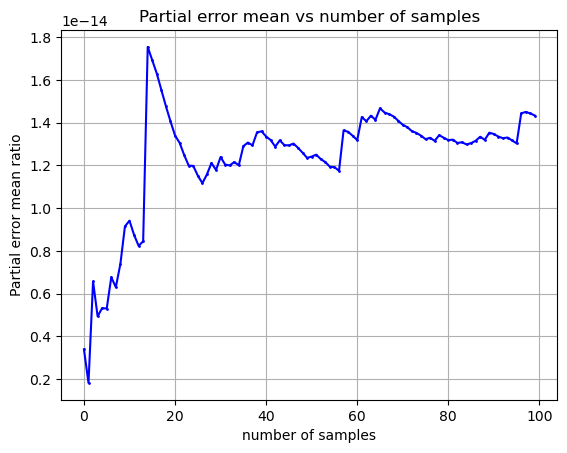

De un total de 100.0 errores, el mayor es 1.488922775444454e-13 y el promedio es de 1.4332432870535223e-14


In [132]:
k = 100 # Examples
m_max = 200 # max size matrix

errors = []
partial_error_mean = []

for i in range(k):    
    m = np.random.randint(1, m_max)
    n = np.random.randint(1, m+1) # m>=n
    A = np.random.rand(m, n)
    x = np.random.rand(n) # real value

    b = A@x
    y = minquad(A, b) #calculate value

    diff = np.linalg.norm(y - x, ord=2)
    errors.append(diff)
    if i == 0:
        partial_error_mean.append(diff)
    else:
        partial_error_mean.append((diff+partial_error_mean[i-1]*i)/(i+1))

indices = np.arange(len(partial_error_mean))
plt.plot(indices, partial_error_mean, marker='o', linestyle='-', color='blue', markersize=1)
plt.xlabel('number of samples')
plt.ylabel('Partial error mean ratio')
plt.title(f'Partial error mean vs number of samples')
plt.grid(True)

# Mostrar el gráfico
plt.show()

df =  pd.DataFrame(np.array(errors))
description = df.describe()
print(f"De un total de {description[0][0]} errores, el mayor es {description[0][-1]} y el promedio es de {description[0][1]}")

Generalmente el error es del orden 1e^-14 y por ende se puede afirmar que las soluciones son iguales salvo problemas de aproximación.

Ahora se estudiará el caso general en donde no conocemos la solución explicita y compararemos la solución encontrada por la función minquad(A, b) con la función np.linalg.lstsq(A, b) encontrada en la librería numpy para calcular mínimos cuadrados. Aunque la solución de mínimos cuadrados no sea única, ambas funciones convergen a la solución de las ecuaciones normales y por ende deberían ser iguales.

In [133]:
k = 100 # Examples
m_max = 200 # max size matrix

diffs = []
excess_error = []

for i in range(k): 
    m = np.random.randint(1, m_max)
    n = np.random.randint(1, m+1) # m>=n
    A = np.random.rand(m, n)
    b = np.random.rand(m)

    minbySVD = np.linalg.lstsq(A, b, rcond=None)[0]
    x = minquad(A, b)

    diff = np.linalg.norm(minbySVD - x, ord=2)
    diffs.append(diff)
    
    excess_error.append(np.linalg.norm(A@x - b, ord=2)-np.linalg.norm(A@minbySVD - b, ord=2))

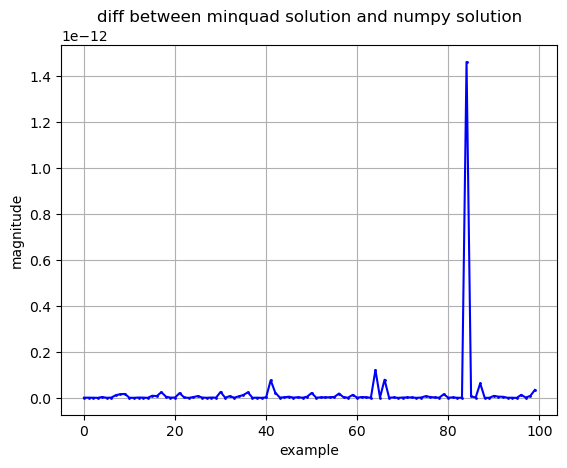

De un total de 100.0 errores, el mayor es 1.488922775444454e-13 y el promedio es de 1.4332432870535223e-14


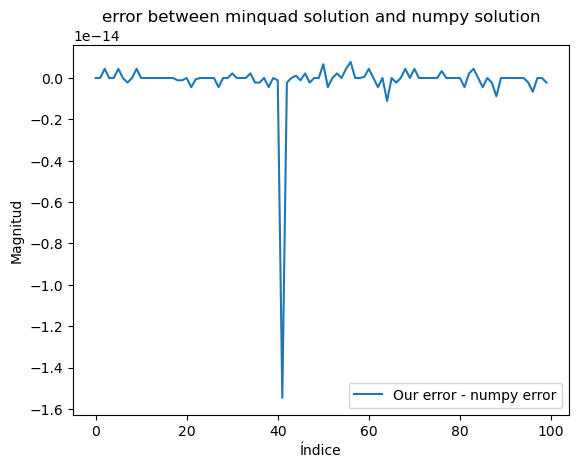

In [134]:
indices = np.arange(len(diffs))
plt.plot(indices, diffs, marker='o', linestyle='-', color='blue', markersize=1)
plt.xlabel('example')
plt.ylabel('magnitude')
plt.title('diff between minquad solution and numpy solution')
plt.grid(True)
plt.show()
df =  pd.DataFrame(np.array(errors))
description = df.describe()
print(f"De un total de {description[0][0]} errores, el mayor es {description[0][-1]} y el promedio es de {description[0][1]}")

plt.plot(excess_error, label='Our error - numpy error')

plt.xlabel('Índice')
plt.ylabel('Magnitud')
plt.title('error between minquad solution and numpy solution')
plt.legend()
plt.show()


Se observa que la función logra el objetivo de encontrar la solución que mínimiza el error cuadrático siendo esta la misma obtenida por fuentes documentadas y probadas salvo posibles errores de redondeo, por lo tanto se concluye que la implementación fue un exito.